In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
sns.set_theme()

In [3]:
raw_data = pd.read_csv("Ecommerce Customers")
raw_data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
raw_data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
raw_data.describe()
data = raw_data.drop(['Avatar', 'Email', 'Address'], axis=1)

In [6]:
data.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


<Axes: xlabel='Length of Membership', ylabel='Count'>

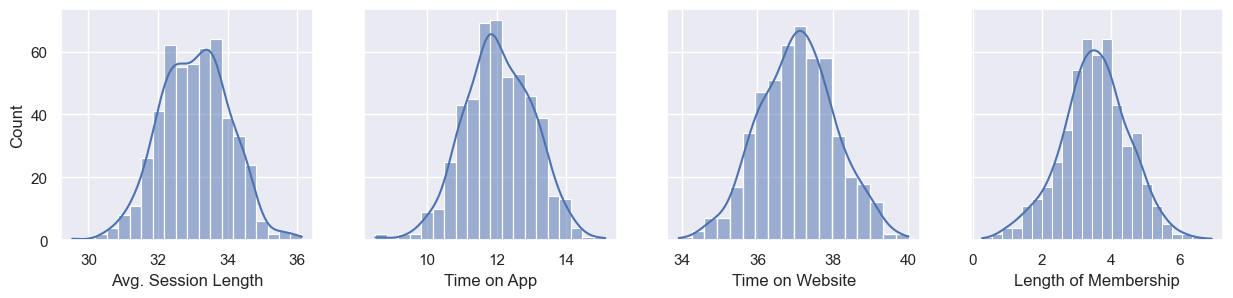

In [7]:
f, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, sharey=True, figsize= (15,3))
sns.histplot(data['Avg. Session Length'], kde=True, ax=ax1)
sns.histplot(data['Time on App'], kde=True, ax=ax2)
sns.histplot(data['Time on Website'], kde=True, ax=ax3)
sns.histplot(data['Length of Membership'], kde=True, ax=ax4)

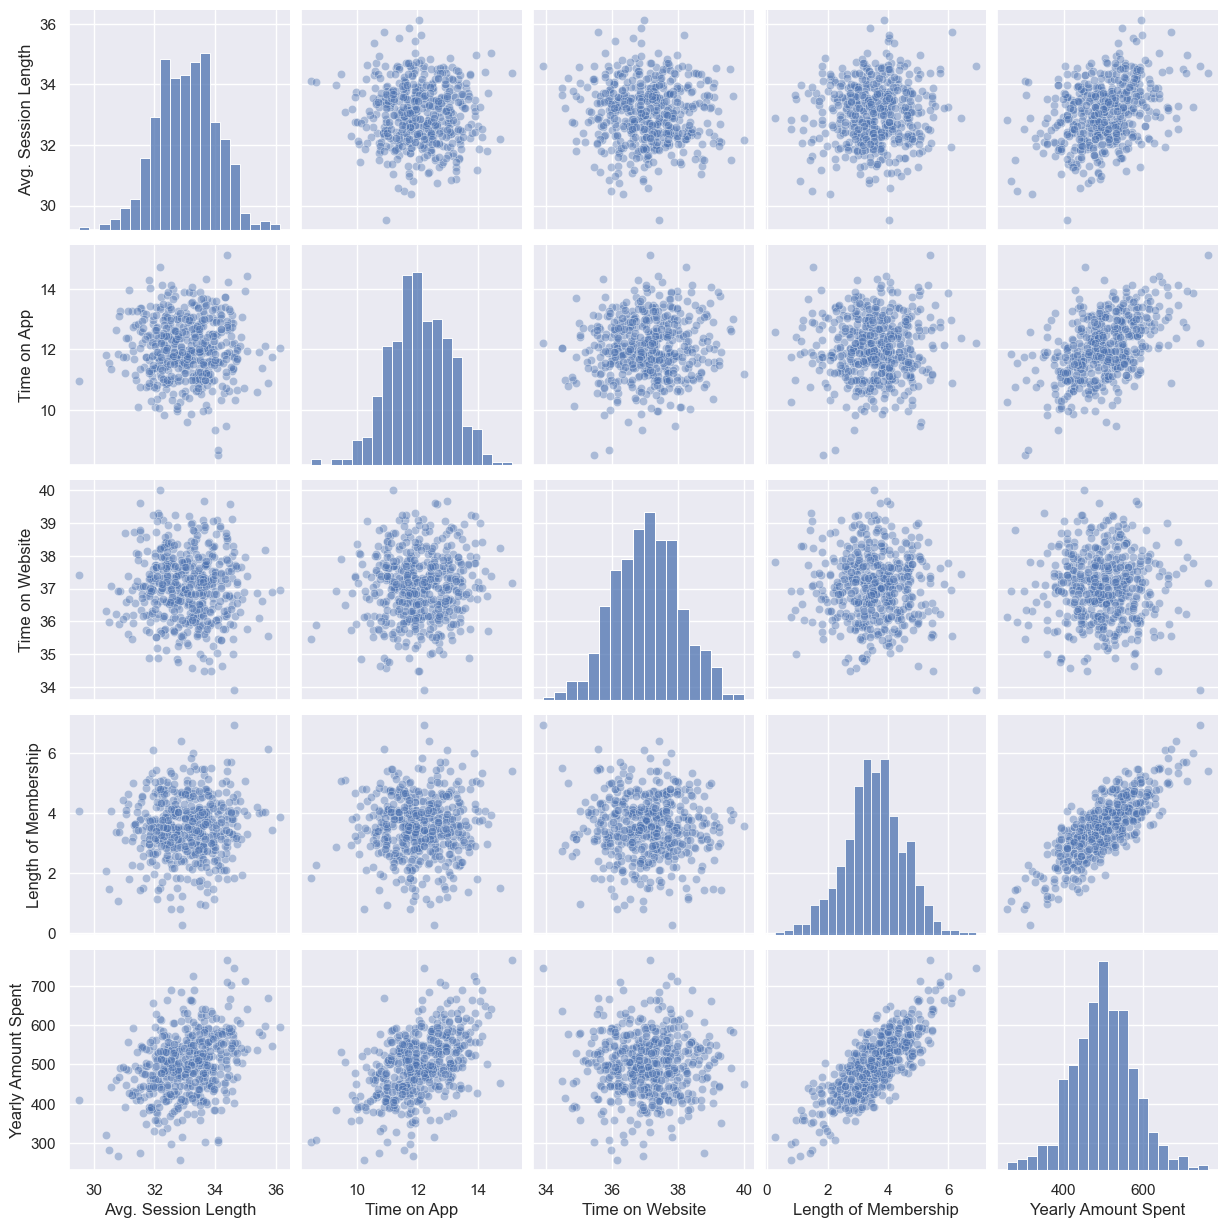

In [8]:
sns.pairplot(data, kind='scatter', plot_kws={'alpha':0.4})

In [9]:
y = data['Yearly Amount Spent']
X = data[['Length of Membership', 'Time on App', 'Avg. Session Length']]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
cdf = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
cdf

,Coefficient
Length of Membership,61.969750
Time on App,38.552433
Avg. Session Length,25.536510


In [30]:
random_data= {'Length of Membership':[10],
              'Time on App':[20], 
              'Avg. Session Length':[14.56]}
rdf = pd.DataFrame(random_data)
rdf

,Length of Membership,Time on App,Avg. Session Length
0,10,20,14.56


In [12]:
yHat = lr.predict(X_test)
yHat

array([457.62186871, 553.76478757, 468.04916018, 401.34242254,
       553.26083386, 450.98597137, 420.96370761, 464.49850206,
       532.39389974, 492.8640221 , 477.37185587, 502.55858019,
       523.78239303, 391.46441613, 416.68111956, 472.61706513,
       510.03248295, 538.43150212, 506.85634242, 423.75519272,
       651.07603747, 620.36038368, 460.24044344, 666.14309301,
       478.47706904, 598.55893814, 483.71781574, 434.60974176,
       438.69105201, 551.29901549, 601.34521396, 589.22998175,
       435.32326319, 494.47075618, 445.63298877, 569.39904027,
       400.42749811, 552.84360248, 517.85603441, 491.46785251,
       530.12796918, 428.19830213, 393.66640227, 520.28454273,
       425.03513776, 551.23948033, 432.04568448, 580.93483741,
       527.12350953, 409.89027118, 554.89253589, 568.97514742,
       533.91894642, 604.51333484, 531.63429948, 465.41401529,
       461.37619613, 461.74167092, 610.78662308, 583.62930124,
       389.60528334, 427.27313718, 534.99349619, 462.67

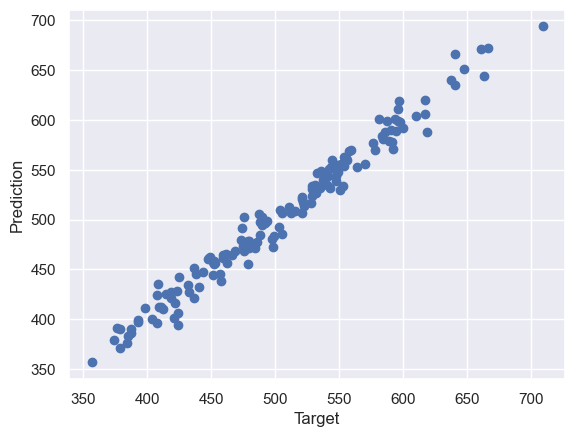

In [13]:
plt.scatter(y_test, yHat)
plt.xlabel("Target")
plt.ylabel("Prediction")
plt.show()

<Axes: xlabel='Yearly Amount Spent', ylabel='Count'>

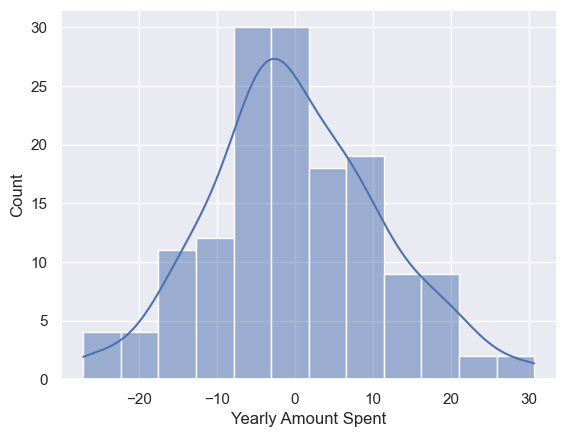

In [14]:
sns.histplot(y_test - yHat, kde=True)

In [15]:
lr.score(X_train, y_train)

0.9865466778127419

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [18]:
print("Mean absolute error ", mean_absolute_error(y_test, yHat))
print("Mean squared error ", mean_squared_error(y_test, yHat))
print("RMSE ", math.sqrt(mean_squared_error(y_test, yHat)))

Mean absolute error  8.681281192769505
Mean squared error  122.40448706556369
RMSE  11.063656134640288


In [19]:
df_pred = pd.DataFrame(yHat, columns=['Predictions'])
df_pred.head()

,Predictions
0,457.621869
1,553.764788
2,468.049160
3,401.342423
4,553.260834


In [20]:
df_pred['Target'] = round(y_test)
df_pred.head(300)

,Predictions,Target
0,457.621869,NaN
1,553.764788,NaN
2,468.049160,488.0
3,401.342423,NaN
4,553.260834,599.0
...,...,...
145,562.732389,NaN
146,411.487891,NaN
147,570.946236,NaN
148,635.123980,424.0


In [21]:
df_pred['Difference'] = y_test-yHat
df_pred

,Predictions,Target,Difference
0,457.621869,NaN,NaN
1,553.764788,NaN,NaN
2,468.049160,488.0,-17.954498
3,401.342423,NaN,NaN
4,553.260834,599.0,7.828264
...,...,...,...
145,562.732389,NaN,NaN
146,411.487891,NaN,NaN
147,570.946236,NaN,NaN
148,635.123980,424.0,30.519092


In [119]:
df_pred.isnull()

,Predictions,Target,Difference
0,False,True,True
1,False,True,True
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
145,False,False,False
146,False,True,True
147,False,False,False
148,False,True,True


In [22]:
df_predNoNull = df_pred.dropna(axis=0)
df_predNoNull.head(50)

,Predictions,Target,Difference
2,468.049160,488.0,-17.954498
4,553.260834,599.0,7.828264
5,450.985971,637.0,-3.550663
6,420.963708,522.0,3.716140
11,502.558580,522.0,8.842040
16,510.032483,458.0,19.156644
18,506.856342,452.0,-2.551022
31,589.229982,448.0,-12.552537
32,435.323263,589.0,10.197169
40,530.127969,533.0,0.357888


In [16]:
def adjusted_r2(x,y):
    r2=lr.score(x,y)
    n = x.shape[0]
    p = x.shape[1]

    adjusted_r2= 1-(1-r2)*(n-1)/(n-p-1)

    return adjusted_r2

adjusted_r2(X_train, y_train)

0.9864300305105402

In [31]:
lr.predict(rdf)

array([734.16425834])